# Milk Adulteration
## 2018B1A40856H_Yadavalli V K Lakshmi Sravani

In [1]:
## importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#data set
df=pd.read_csv("Milk Adulteration data.csv")

In [4]:
df.head()

,Nr,Date,Time,Ingredient,IsRawMilk,Cells,QValue,Fat,Protein,Lactose,Solids,FFA,Citrate,FrzPoint,SNF,MUN,Casein
0,13,3/10/2016,15:20:25,peroxide,no,82,92.89,3.58,3.37,4.57,12.51,11,1392,0.564,8.93,30.8,2.61
1,1,5/10/2016,14:20:14,raw,yes,66,91.26,3.47,3.38,4.59,12.41,39,1317,0.564,8.97,15.2,2.67
2,3,31/8/2018,11:08:17,bicarbonate,no,895,91.85,3.51,2.98,4.50,11.98,12,1120,0.522,8.63,1.6,2.27
3,4,22/9/2017,15:41:49,raw,yes,151,86.69,3.40,3.22,4.66,12.23,19,1260,0.541,9.21,10.7,2.49
4,1,11/10/2016,15:13:43,raw,yes,527,89.41,3.54,3.17,4.53,12.22,60,1442,0.556,8.66,13.5,2.46


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nr          969 non-null    int64  
 1   Date        969 non-null    object 
 2   Time        969 non-null    object 
 3   Ingredient  969 non-null    object 
 4   IsRawMilk   969 non-null    object 
 5   Cells       969 non-null    int64  
 6   QValue      969 non-null    float64
 7   Fat         969 non-null    float64
 8   Protein     969 non-null    float64
 9   Lactose     969 non-null    float64
 10  Solids      969 non-null    float64
 11  FFA         969 non-null    int64  
 12  Citrate     969 non-null    int64  
 13  FrzPoint    969 non-null    float64
 14  SNF         969 non-null    float64
 15  MUN         969 non-null    float64
 16  Casein      969 non-null    float64
dtypes: float64(9), int64(4), object(4)
memory usage: 128.8+ KB


In [6]:
df.describe()

,Nr,Cells,QValue,Fat,Protein,Lactose,Solids,FFA,Citrate,FrzPoint,SNF,MUN,Casein
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,7.074303,358.284830,90.016584,3.620279,3.300196,4.624076,12.522487,46.131063,1443.882353,0.549450,9.034881,13.818700,2.562890
std,4.759793,344.324223,4.998924,0.349956,0.136071,0.211785,0.453637,28.804025,174.928606,0.028454,0.338272,5.214027,0.128933
min,1.000000,0.000000,62.650000,2.240000,2.750000,4.060000,11.120000,2.000000,1075.000000,0.354000,8.210000,0.000000,2.120000
25%,3.000000,157.000000,87.570000,3.410000,3.220000,4.500000,12.230000,29.000000,1331.000000,0.531000,8.790000,11.200000,2.480000
50%,6.000000,283.000000,90.750000,3.610000,3.310000,4.620000,12.490000,43.000000,1413.000000,0.554000,9.020000,13.700000,2.580000
75%,10.000000,476.000000,93.400000,3.820000,3.380000,4.700000,12.800000,56.000000,1531.000000,0.568000,9.250000,16.000000,2.640000
max,20.000000,5226.000000,100.000000,5.420000,3.840000,5.500000,14.680000,394.000000,2217.000000,0.635000,10.180000,44.400000,3.000000


In [7]:
#checking null values
df.isna().sum()

Nr            0
Date          0
Time          0
Ingredient    0
IsRawMilk     0
Cells         0
QValue        0
Fat           0
Protein       0
Lactose       0
Solids        0
FFA           0
Citrate       0
FrzPoint      0
SNF           0
MUN           0
Casein        0
dtype: int64

In [8]:
#checking Ingredient
df['Ingredient'].value_counts()

raw             499
formaldehyde    105
sucrose          98
bicarbonate      97
peroxide         89
starch           81
Name: Ingredient, dtype: int64

In [9]:
#checking IsRawMilk
df['IsRawMilk'].value_counts()

yes    499
no     470
Name: IsRawMilk, dtype: int64

In [10]:
df['FFA'].value_counts()

35     28
25     25
50     24
20     23
46     23
       ..
105     1
99      1
98      1
84      1
2       1
Name: FFA, Length: 117, dtype: int64

In [11]:
df['Cells'].value_counts()

46     9
11     8
180    8
168    7
176    7
      ..
137    1
483    1
485    1
487    1
0      1
Name: Cells, Length: 531, dtype: int64

In [12]:
df['Citrate'].value_counts()

1404    10
1322     8
1423     8
1403     7
1347     6
        ..
1591     1
1592     1
1601     1
1603     1
2052     1
Name: Citrate, Length: 472, dtype: int64

In [13]:
X=df.drop(columns=['Time','Date','Ingredient','IsRawMilk'])
X.shape, df.shape

((969, 13), (969, 17))

In [14]:
Y = df['IsRawMilk']

In [15]:
#Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(969, 13)

In [16]:
X_scaled

array([[ 1.24559124, -0.80281166,  0.57510375, ..., -0.3102107 ,
         3.25853086,  0.36557611],
       [-1.27682864, -0.84930349,  0.24886517, ..., -0.19190148,
         0.26505683,  0.83117512],
       [-0.85642533,  1.55955431,  0.36695153, ..., -1.19752991,
        -2.34463847, -2.2728183 ],
       ...,
       [-1.27682864, -0.61393861, -0.80390472, ...,  0.51795389,
        -0.96303507, -0.56562192],
       [ 0.61498627, -0.17517199, -0.33356075, ...,  0.99119081,
        -0.82871252,  0.52077578],
       [-0.64622367, -0.63718453,  0.27088127, ..., -0.6947157 ,
        -0.1762887 , -0.87602126]])

In [17]:
X = pd.DataFrame(X_scaled, columns= ['Nr', 'Cells',	'QValue',	'Fat',	'Protein',	'Lactose',	'Solids',	'FFA',	'Citrate',	'FrzPoint',	'SNF',	'MUN',	'Casein'])

In [18]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((775, 13), (194, 13), (775,), (194,))

In [20]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
# SVM
svm_model = SVC(kernel= 'rbf')
svm_model.fit(X_train, Y_train)

SVC()

In [22]:
Y_test_predict_svm = svm_model.predict(X_test)

In [42]:
cm=confusion_matrix(Y_test,Y_test_predict_svm)

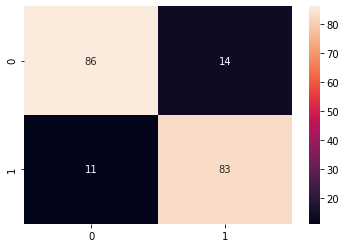

In [41]:
sns.heatmap(cm,annot=True)

In [24]:
accuracy_score(Y_test, Y_test_predict_svm)

0.9639175257731959

In [25]:
#Ramdom Forest
rf_model = RandomForestClassifier(n_estimators= 100, max_depth= 5)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

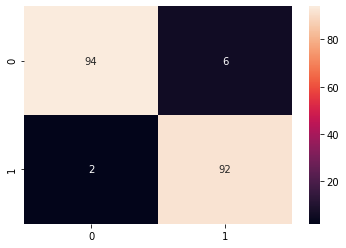

In [26]:
Y_test_predict_rf = rf_model.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predict_rf)
sns.heatmap(cm,annot=True)

In [27]:
accuracy_score(Y_test,Y_test_predict_rf)

0.9587628865979382

In [28]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

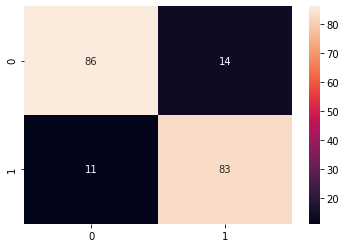

In [29]:
Y_test_predict_nb = nb_model.predict(X_test)
cm=confusion_matrix(Y_test,Y_test_predict_nb)
sns.heatmap(cm,annot=True)

In [30]:
accuracy_score(Y_test,Y_test_predict_nb)

0.8711340206185567

In [31]:
# Multiclass Classification
Y_Ingredient = df['Ingredient']

In [32]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
Y_label = label.fit_transform(Y_Ingredient)

In [33]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y_label, test_size = 0.2, random_state= 1)


In [37]:
svm_multi_model = RandomForestClassifier(n_estimators=100, max_depth=5)
svm_multi_model.fit(X_tr, Y_tr)

RandomForestClassifier(max_depth=5)

In [38]:
Y_pred_test_svm = svm_multi_model.predict(X_te)

In [39]:
Y_pred_test_svm

array([3, 3, 3, 5, 3, 3, 4, 3, 4, 3, 3, 4, 3, 1, 3, 2, 3, 2, 3, 1, 1, 3,
       3, 5, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 4, 1, 3, 4, 4, 5, 3, 3, 3, 2,
       3, 3, 5, 3, 3, 5, 3, 3, 3, 0, 2, 2, 1, 3, 1, 4, 3, 5, 5, 3, 3, 3,
       4, 3, 3, 3, 3, 5, 1, 2, 3, 3, 5, 3, 1, 5, 1, 1, 3, 0, 5, 3, 4, 3,
       3, 3, 2, 3, 3, 3, 0, 1, 4, 3, 0, 2, 0, 3, 0, 1, 3, 3, 3, 0, 2, 3,
       2, 3, 5, 3, 3, 2, 5, 5, 3, 3, 4, 3, 3, 3, 3, 3, 0, 1, 3, 1, 5, 2,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 4, 3, 3, 3, 0, 3, 3, 5, 3, 3, 1, 5,
       3, 2, 0, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 5, 3, 2, 0,
       3, 3, 3, 5, 3, 1, 3, 3, 3, 2, 3, 3, 5, 3, 3, 2, 3, 1])

In [40]:
accuracy_score(Y_te, Y_pred_test_svm)

0.8762886597938144

## Accuracy Comparison
### Binary Classification
#### SVM - Accuracy - 0.96
#### Random Forest - Accuracy - 0.95
#### Gaussian Navie Baeys - Accuracy - 0.96

## Multi Class classification 
#### SVM - Accuracy - 0.8762


